<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2023<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Simulated Annealing <br>
<font color=696880 size=4>
    Reza Soumi, Rouzbeh Pirayadi, Amir Mohammad Izadi

____

# Personal Data

In [25]:
# Set your student number
student_number = '400110154'
Name = 'Sina'
Last_Name = 'Namazi'

# Rules
- Make sure that all of your cells can be run perfectly. 

# Q2: DNA Center Point (100 Points)

<font size=4>
Author: Rouzbeh Pirayadi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Libraries

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

Alphabet = np.array(['a', 'c', 'g', 't'])

## Problem Definition

DNA is composed of four nucleic-acid bases. namely A, C, G and T. We consider DNA as a string from these four characters. In this exercise we want to find the center of a group of DNAs. In order to define center we need to first define distance between two DNAs (strings). Note that DNAs have the same length, so their distsance could be defined as:
$$
dist(a, b) = \sum_{a[i] \neq b[i]} 1
$$
for example the distance between the below DNAs is two since they are different in two indecies.
$$
AGGCT
$$
$$
ACGCA
$$

Now we can define the center of a set of DNAs as follows.
$$
center(S) = \arg \min_{a}{\{\max_{i \in S}{\{dist(a, i)}\}\}}
$$
In other words center of a set of DNAs is a DNA which its distance from the furthest DNA in the set is the least. Below is an example.

$$
center(\{ACCT, AGCG, ACTG\}) = \{ACCG\}
$$

Note that center is not necassarily unique. Look at the below case for instance.

$$
center(\{AA, AC, AG\}) = \{AA, AC, AG, AT\}
$$

However the maximum distance of the center is unique. We call this value the radius of the set.

$$
radius(S) = \min_{a}{\{\max_{i \in S}{\{dist(a, i)}\}\}}
$$
$$
radius(\{AA, AC, AG\}) = 1
$$

Our goal is to find the center and the radius utilizing __simulated annealing__.

## Initializing States

First we must model our problem, so we will be able to solve it. Our solution is a string with the same length as the objects in $S$. In order to represent the solutions which are the states in our problem, we use a numpy array of characters.

In [27]:
def initialize_state(n: int) -> np.ndarray:
    ##################################################################
    # (5 Points)                                                     #
    # [inputs]                                                       #
    # length of the vector                                           #
    # [outputs]                                                      #
    # returns a random vector with length n and                      #
    # uniform probability from Alphabet elements as a numpy array    #
    ##################################################################
    random_dna_sequence = np.random.choice(['a', 'g', 'c', 't'], n)
    return random_dna_sequence

## Evaluation Function

We want to start from a state(solution) and try minimizing the distance. In other words the outer minimization of the center formula will be done by simulated annealing so the inner maximization must be done by the evaluation function. As a result the evaluation function , represented by e, is as follows.

$$
f(a) = \max_{i \in S}{dist(a, i)}
$$

In [28]:
def calculate_evaluation(genomes: np.ndarray, state: np.ndarray) -> int:
    ##################################################################
    # (10 Points)                                                    #
    # [inputs]                                                       #
    # genomes is a 2D numpy array and represents the set of DNAs     #
    # state is a 1D numpy array which represents "a" in the equation #
    # [outputs]                                                      #
    # the function returns the value of f(a)                         #
    ##################################################################
    genomes = np.vstack([i for i in genomes])
    n, m = genomes.shape
    state = state.reshape(1, -1).repeat(n, 0)
    dist = np.array(state != genomes)
    return np.max(dist.sum(axis=1))

## Neighboring State

In each iteration of __simulatd annealing__ a neighboring state of the current state is accessed. So we need to define neighboring states. Two states are neighbors if they are exactly different at one index.

$$
(a, b) \in N \iff \exists i: a[i] \neq b[i] \land \forall j \neq i: a[j] = b[j]
$$

for example the following states are neighbors.

$$
ACGCT
$$
$$
ACTCT
$$

In [29]:
def get_neighbor_state(state: np.ndarray) -> np.ndarray:
    ##################################################################
    # (15 Points)                                                    #
    # [inputs]                                                       #
    # state is a 1D numpy array which represents a state             #
    # [outputs]                                                      #
    # a neighboring state of input is returned                       #
    # [notice]                                                       #
    # note the the same state as the input should not be returned    #
    # and the neighbor should be selected uniformly at random        #
    ##################################################################
    n = len(state)
    i = random.randint(0, n-1)
    nucleotides = ['a', 'g', 't', 'c']
    nucleotides.remove(state[i])
    neighbor = np.copy(state)
    neighbor[i] = np.random.choice(nucleotides, 1)[0]
    return neighbor

## Temperature and Acceptance Probability

After implementing all the prerequisites we are now able to implement the main algorithm. Consider 
$a_1$ and $a_2$ as the current and new states. The acceptance probability would be as follows.
$$
P(a_1, a_2)= 
\begin{cases}
    1 & f(a_2) < f(a_1) \\
    e ^ {-\frac{(f(a_2) - f(a_2))}{T}} & o.w. \\
\end{cases}
$$
In the above equation T is temperature and changes as below where $i$ is the iteration number.

$$
T = T_0 \times \alpha^i
$$

Now complete the below function according to the comment about input and outputs.

In [30]:
def simulated_annealing(genomes: np.ndarray, initial_state: np.ndarray, alpha: float, initial_temp: float, max_iteration: int, min_temperature: float):
    ##############################################################################
    # (35 Points)                                                                #
    # [inputs]                                                                   #
    # genomes is a 2D numpy array and represents the set of DNAs                 #
    # initial state is the state to start with                                   #
    # alpha is the temperature decay rate                                        #
    # initial temp is T0                                                         #
    # max_iteration is the maximum number of iteration (termination condition)   #
    # min_temperature is the minimum temperature (termination condition)         #
    # [outputs]                                                                  #
    # best state found as a numpy array                                          #
    # best state's evaluation value                                              #
    # all the evaluations of current state as a normal list                      #
    ##############################################################################
    curr_state = initial_state
    i = 0
    temperature = initial_temp
    evaluations = []
    best_state = None
    best_value = float('INF')
    while i < max_iteration and temperature > min_temperature:
        next_state = get_neighbor_state(curr_state)
        curr_state_score = calculate_evaluation(genomes, curr_state)
        next_state_score = calculate_evaluation(genomes, next_state)
        evaluations.append(curr_state_score)
        if next_state_score < curr_state_score:
            curr_state = next_state
            best_state = curr_state
            best_value = next_state_score
        else:
            p = np.exp((curr_state_score - next_state_score)/temperature)
            if random.random() < p:
                curr_state = next_state
        
        i += 1
        temperature *= alpha
    
    return best_state, best_value, evaluations
    ################################################################################
    ####################################complete####################################
    ################################################################################


## Validate

In order to validate our implementation of simulated annealing, we implement a naive way to solve the problem. This algorithm traverses all possible sequences and calculates the solution. Note that your implementation of "calculate_evaluation" needs to be correct for this algorithm to work correctly.

In [31]:
##############################################
# no need to the any thing                   #
##############################################

def go_to_next(number, alphabet_length):
    idx = len(number) - 1
    while idx >= 0:
        if number[idx] < alphabet_length - 1:
            number[idx] += 1
            return True
        else:
            number[idx] = 0
            idx -= 1
    return False


def brute_force(genomes):
    n = len(genomes[0])
    curr_state_index = np.zeros(n).astype(int)
    best_state = None
    best_value = float('INF')

    while True:
        new_result = calculate_evaluation(genomes, Alphabet[curr_state_index])

        if new_result < best_value:
            best_value = new_result
            best_state = Alphabet[curr_state_index]

        if not go_to_next(curr_state_index, len(Alphabet)):
            break

    return best_state, best_value


Run the cell below to compare your algorithm with brute force. your answers should be close to the results acheived from brute force (10 points).

In [32]:
genomes_array = np.array([
                        [['g', 'c', 'a', 't', 'c'],
                         ['g', 'a', 'c', 't', 'c'],
                         ['c', 'a', 'c', 'g', 'c']],
                         [['a', 'c', 'g', 'g', 'g', 'a', 'c'],
                          ['a', 'g', 'g', 'c', 'g', 'a', 'g'],
                          ['c', 'g', 'g', 'g', 'g', 't', 'c']],
                        [['c', 'c', 'a', 'c', 't', 'a', 'g', 'c', 'a'],
                         ['c', 't', 'a', 'g', 't', 'c', 't', 'c', 't'],
                         ['c', 't', 'c', 'c', 't', 'c', 'c', 'c', 'g']]], dtype=object)

for genomes in genomes_array:
    initial_state = initialize_state(len(genomes[0]))
    start_time_sa = time.time()
    result_dna_sa, result_value_sa, _ = simulated_annealing(genomes, initial_state, 0.9, 500, 1000, 1e-3)
    middle_time = time.time()
    result_dna_bf, result_value_bf = brute_force(genomes)
    end_time_bf = time.time()

    print(f'Simulated Annealing found solution {result_dna_sa} with value {result_value_sa} in %.3f milliseconds' %((middle_time - start_time_sa) * 1000))
    print(f'Brute Force         found solution {result_dna_bf} with value {result_value_bf} in %.3f milliseconds' %((end_time_bf - middle_time) * 1000))



Simulated Annealing found solution ['c' 'c' 'c' 't' 'c'] with value 2 in 6.432 milliseconds
Brute Force         found solution ['c' 'a' 'a' 't' 'c'] with value 2 in 17.278 milliseconds
Simulated Annealing found solution ['a' 'g' 'g' 'g' 'g' 'a' 'c'] with value 2 in 7.500 milliseconds
Brute Force         found solution ['a' 'g' 'g' 'g' 'g' 'a' 'c'] with value 2 in 275.339 milliseconds
Simulated Annealing found solution ['c' 'c' 'a' 'c' 't' 'c' 'c' 'c' 't'] with value 3 in 7.080 milliseconds
Brute Force         found solution ['c' 'c' 'a' 'c' 't' 'c' 'c' 'c' 't'] with value 3 in 4438.878 milliseconds


According to the above results, what do you think is the advantage of simulated annealing over brute force (5 points)?

<font color='cyan'>

Advantage of simulated annealing over brute force is that it can find a solution in a reasonable time for large n. That's because it doesn't need to check all the possible solutions in the search space and it can find a reasonable solution with a good probability. It first explores the whole search space, but as it moves on, it tries to find the best answer in the local space.

</font>


## Results

Run the below cells to see the results (10 points).

In [33]:
def  draw_results(evaluations):
    ##############################################
    # no need to the any thing                   #
    ##############################################
    plt.plot(evaluations)
    plt.title('Simulated Annealing algorithm')
    plt.ylabel('value')
    plt.xlabel('iteration')
    plt.show()

In [34]:
example_genomes = np.array([['c', 'c', 'a', 'c', 't', 'a', 'g', 'g', 'a'],
                            ['c', 't', 'a', 'g', 't', 'c', 't', 'g', 'a'],
                            ['c', 't', 'c', 'c', 't', 'c', 'c', 'g', 'a']])
initial_state = initialize_state(len(example_genomes[0]))

results: ['c' 't' 'a' 'c' 't' 'c' 'g' 'g' 'a'] and  radius: 2


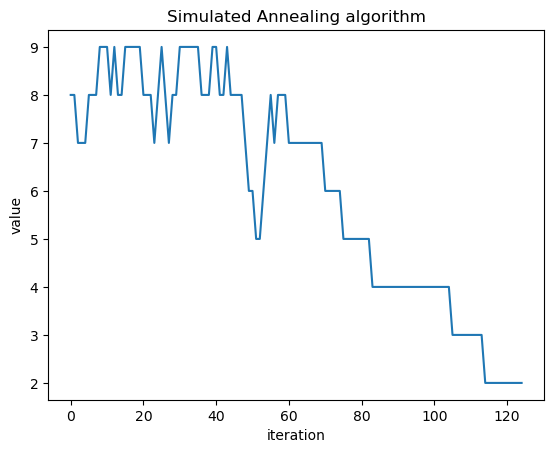

In [50]:
result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 0.9, 500, 1000, 1e-3)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)


results: ['c' 'c' 'a' 't' 't' 'c' 'c' 'g' 'a'] and  radius: 3


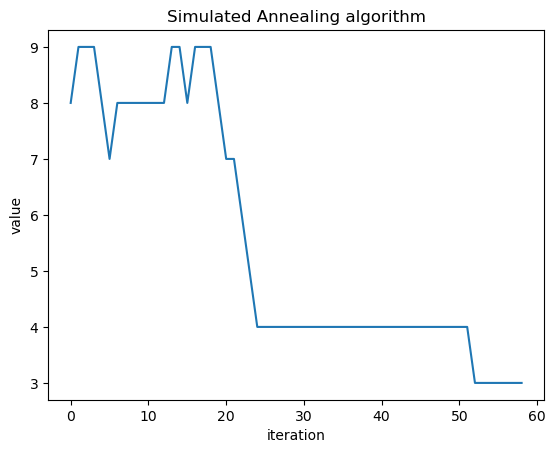

In [38]:

result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 0.8, 500, 1000, 1e-3)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)


results: ['c' 't' 'a' 'c' 't' 'c' 'g' 'g' 'a'] and  radius: 2


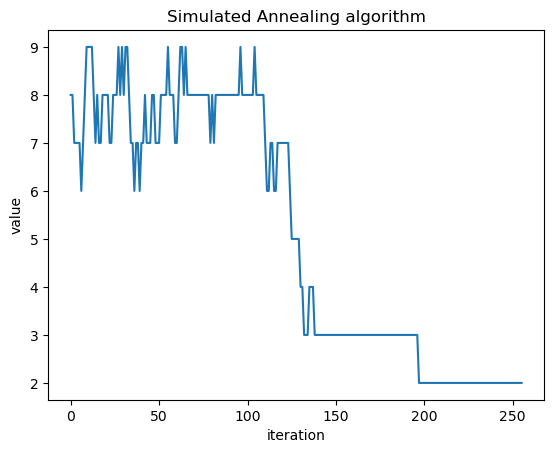

In [52]:
result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 0.95, 500, 1000, 1e-3)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)


Now compare the diagrams for different values of alpha and analyze their shapes (10 points).

<font color='cyan'>


As the value of the chosen alpha decreases our search algorithm spends less time exploring the search space and more time exploiting the current state and fining the local minima. This might be bad because the local minima might not be the best answer possible as it's obvious in the examples above. When alpha is chosesn to be equal to 0.8 the best answer has the value of 3 which is not the best possible value as shown in the other two examples. On the other hand if the value of alpha is chosen to be higher, it might need more iterations to find the best answer but it will be more likely to find the global minima. As shown in the examples above when alpha is chosen to be 0.95 the best answer has the value of 2 which is better than 3.

</font>

